PROBLEM STATEMENT

Financial institutions and online platforms face challenges in identifying fraudulent transactions in real time. The goal of this project is to develop a predictive model using logistic regression to classify transactions as fraudulent or legitimate, based on various transaction features. By analyzing this dataset, we aim to identify key indicators of fraud and build a model that can accurately predict fraudulent activity.

In [5]:
# load dataset
import pandas as pd
import numpy as np
df = pd.read_csv('synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


DATA CLEANING

In [6]:
# Check missing values per column
print(df.isnull().sum())

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())


0


In [8]:
# Drop rows where Fraud_Label is NaN

df = df.dropna(subset=['Fraud_Label'])


EXPLORATORY DATA ANALYSIS

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-1238029623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='Fraud_Label', ylabel='Avg_Transaction_Amount_7d'>

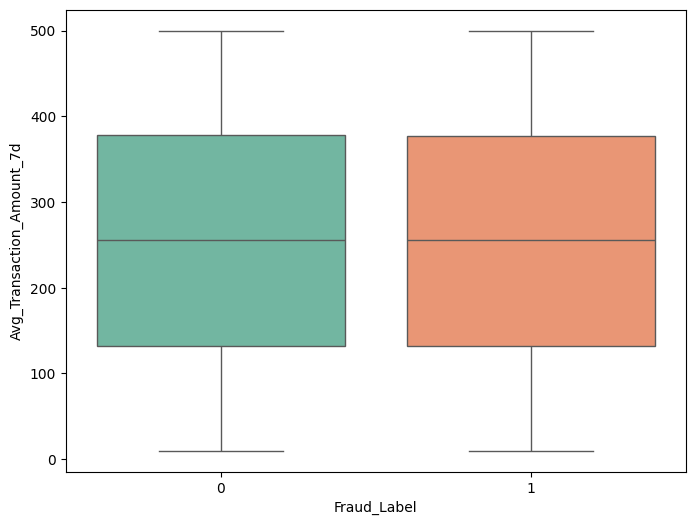

In [10]:
# A boxplot showing account_balance against fraud_label
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x='Fraud_Label',
    y='Avg_Transaction_Amount_7d',
    palette='Set2'
)

Insights:

The distributions overlap heavily, so account balance alone cannot reliably predict fraud.

Fraudulent and non fraudulent transactions have comparable balance distributions, suggesting that fraud might depend more on other factors.

In [11]:
Fraud_Case = df[df['Fraud_Label']== 1]
Fraud_Case.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,3,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1


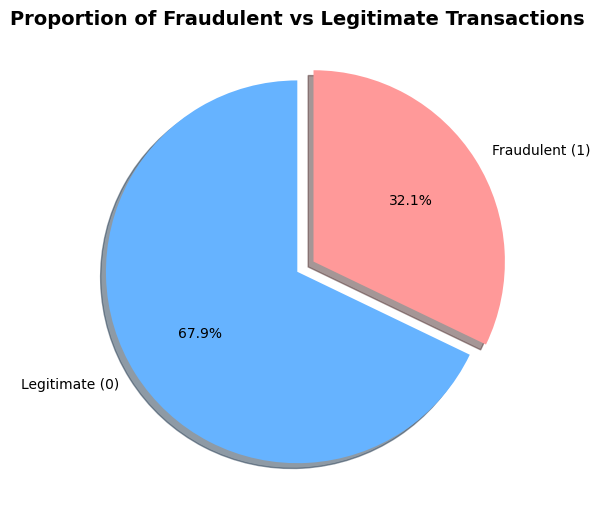

In [12]:
# A pie chart showing the proportion of fraudulent vs legitimate transactions

fraud_counts = df['Fraud_Label'].value_counts()

# Define labels and colors
labels = ['Legitimate (0)', 'Fraudulent (1)']
colors = ['#66b3ff', '#ff9999']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    fraud_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    shadow=True,
    explode=(0, 0.1)
)

plt.title('Proportion of Fraudulent vs Legitimate Transactions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Insights:

The pie chart highlights that legitimate transactions form the majority (68%), while fraudulent transactions make up a significant minority (32%).

This moderate imbalance requires attention during model training to ensure that the model accurately identifies fraudulent activities without being biased toward legitimate transactions.

/tmp/ipython-input-2460872767.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


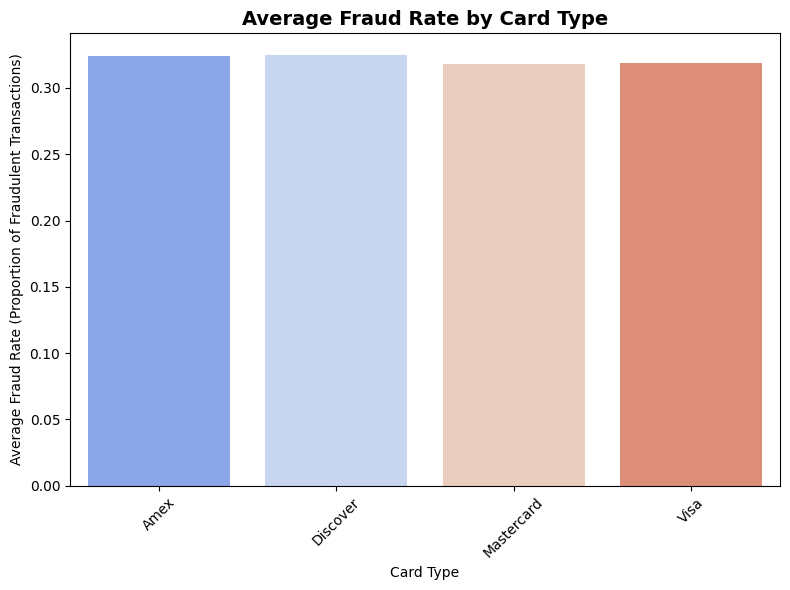

In [13]:
#Barplot showing the average fraud rate by card type

# Calculate fraud rate per card type
fraud_rate = df.groupby('Card_Type')['Fraud_Label'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.barplot(
    data=fraud_rate,
    x='Card_Type',
    y='Fraud_Label',
    palette='coolwarm'
)
plt.title('Average Fraud Rate by Card Type', fontsize=14, fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Average Fraud Rate (Proportion of Fraudulent Transactions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insights:

The bar plot shows that all card types (Amex, Discover, Mastercard, Visa) have comparable fraud rates around 32%.

This suggests that in this dataset, card type alone does not strongly influence fraud likelihood.
Future analysis should therefore focus on behavioral, transactional, or authentication related features for stronger predictive power.

In [14]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [15]:
# Create a seperate column under the Fraud_case data frame that groups the Card_Age

max_age = Fraud_Case['Card_Age'].max()
bins = list(range(0, int(max_age) + 100, 100))
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Create a new column with grouped ranges
Fraud_Case['Card_Age_Group'] = pd.cut(Fraud_Case['Card_Age'], bins=bins, labels=labels, right=False)

# View the result
print(Fraud_Case[['Card_Age', 'Card_Age_Group']].head())

   Card_Age Card_Age_Group
1       186        100-200
2       226        200-300
3        76          0-100
4       140        100-200
7       182        100-200


/tmp/ipython-input-650115348.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fraud_Case['Card_Age_Group'] = pd.cut(Fraud_Case['Card_Age'], bins=bins, labels=labels, right=False)


<Axes: xlabel='Card_Age_Group', ylabel='count'>

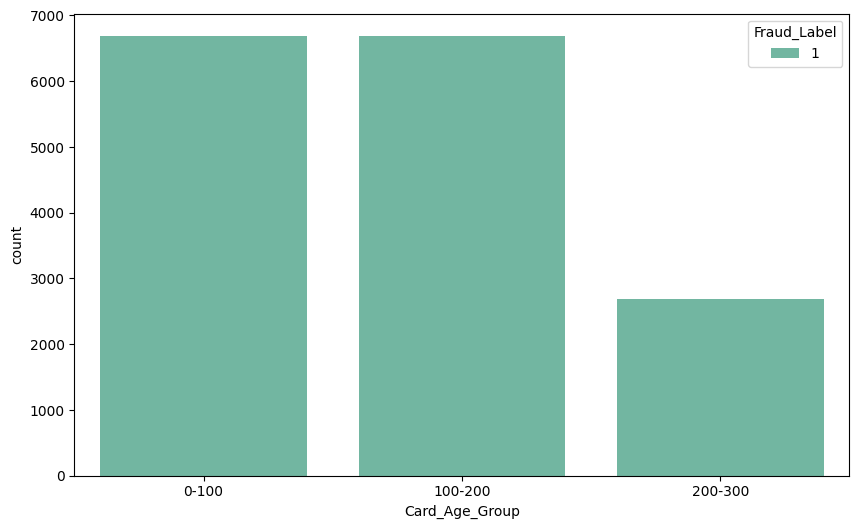

In [16]:
# Create a count plot that shows Card_Age_Group against Fraud_Label
plt.figure(figsize=(10, 6))
sns.countplot(
    data=Fraud_Case,
    x='Card_Age_Group',
    hue='Fraud_Label',
    palette='Set2'
)

Insights:

The following chart shows that fraud cases are more prevalent between card ages ranging from 0 to 200 days while card ages from 200 to 300 days have low cases of fraud.

This proves that newer issued cards are more prone to be used for fraudulent activities while cards which have been used for longer periods of time can be more trusted.

In [17]:
Fraud_Case.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Card_Age_Group
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1,100-200
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1,200-300
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1,0-100
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1,100-200
7,TXN_49498,USER_4660,7.08,ATM Withdrawal,2023-02-25 03:43:00,45826.27,Tablet,London,Restaurants,0,...,164.38,4,Discover,182,1764.66,Biometric,0.5326,0,1,100-200


FEATURE ENGINEERING

In [ ]:
df.head()

In [19]:
# Convert Timestamp to datetime and split it into Year, Month and Day

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Day
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,Amex,65,883.17,Biometric,0.8494,0,0,2023,8,14
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,Mastercard,186,2203.36,Password,0.0959,0,1,2023,6,7
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,Visa,226,1909.29,Biometric,0.8400,0,1,2023,6,20
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,Visa,76,1311.86,OTP,0.7935,0,1,2023,12,7
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,Mastercard,140,966.98,Password,0.3819,1,1,2023,11,11


In [20]:
# Drop categorical columns that serve no use such as Transaction_ID and User_ID
df.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Day
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,...,Amex,65,883.17,Biometric,0.8494,0,0,2023,8,14
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,...,Mastercard,186,2203.36,Password,0.0959,0,1,2023,6,7
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,...,Visa,226,1909.29,Biometric,0.8400,0,1,2023,6,20
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,...,Visa,76,1311.86,OTP,0.7935,0,1,2023,12,7
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,...,Mastercard,140,966.98,Password,0.3819,1,1,2023,11,11


In [21]:
# Drop Timestamp column
df.drop('Timestamp', axis=1, inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,...,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label,Year,Month,Day
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,...,Amex,65,883.17,Biometric,0.8494,0,0,2023,8,14
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,...,Mastercard,186,2203.36,Password,0.0959,0,1,2023,6,7
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,...,Visa,226,1909.29,Biometric,0.8400,0,1,2023,6,20
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,...,Visa,76,1311.86,OTP,0.7935,0,1,2023,12,7
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,...,Mastercard,140,966.98,Password,0.3819,1,1,2023,11,11


In [22]:
# Run label encoding on the categorical columns to convert them to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print("Categorical columns encoded:", list(categorical_cols))
print(df.head())

Categorical columns encoded: ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
   Transaction_Amount  Transaction_Type  Account_Balance  Device_Type  \
0               39.79                 3         93213.17            0   
1                1.19                 1         75725.25            1   
2               28.96                 2          1588.96            2   
3              254.32                 0         76807.20            2   
4               31.28                 3         92354.66            1   

   Location  Merchant_Category  IP_Address_Flag  Previous_Fraudulent_Activity  \
0         3                  4                0                             0   
1         2                  0                0                             0   
2         1                  3                0                             0   
3         2                  0                0                             0   
4         1         

In [23]:
# Train - Test splitting and class balancing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE ONLY on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)



In [24]:
# Verify class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Fraud_Label
0    27146
1    12854
Name: count, dtype: int64
After SMOTE: Fraud_Label
0    27146
1    27146
Name: count, dtype: int64


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Proceed to train using Logistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred = log_reg.predict(X_test_scaled)


In [28]:
# Evaluate performance

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Results:
Accuracy: 0.7741

Confusion Matrix:
 [[5312 1475]
 [ 784 2429]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      6787
           1       0.62      0.76      0.68      3213

    accuracy                           0.77     10000
   macro avg       0.75      0.77      0.75     10000
weighted avg       0.79      0.77      0.78     10000



ROC-AUC Score: 0.876145884249612


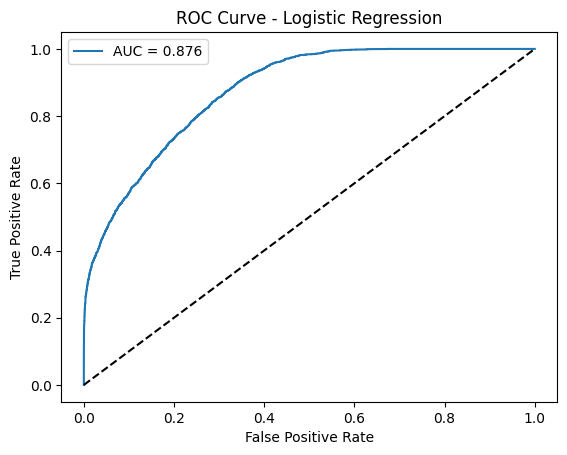

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute probabilities
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()